In [3]:
from fastbook import *
from fastai.vision.widgets import *
from jmd_imagescraper.core import *

In [4]:
vehicle_types = 'car','trucks','bicycle','motorcycle','bus'
path = Path().cwd()/"vehicles"

In [128]:
if not path.exists():
    path.mkdir()
    
# for o in vehicle_types:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True)
#     duckduckgo_search(path,dest,f"{o}",max_results=1000)

Duckduckgo search: car


Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP._niNxr_isjgm2SgrcvElRQHaHu&pid=Api
Duckduckgo search: trucks


Exception occured while retrieving https://tse1.mm.bing.net/th?id=OIP.7ByPN0S4vcA_gNO2p2JQLQHaGr&pid=Api
Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP.SW77CuLwTN3bXChHqFMUcAHaGL&pid=Api
Duckduckgo search: bicycle


Duckduckgo search: motorcycle


Duckduckgo search: bus


Duckduckgo search: tram


KeyboardInterrupt: 

In [71]:
fns = get_image_files(path)
fns

(#1299) [Path('D:/SEPA/fastai/vehicles/bicycle/001_d536160f.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/002_bbc41276.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/003_ed7b17fc.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/004_c93dc534.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/005_5427dfe8.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/006_06dfd3a1.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/007_9356dbd1.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/008_82a1b86f.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/009_60834ffb.jpg'),Path('D:/SEPA/fastai/vehicles/bicycle/010_77efbc68.jpg')...]

In [72]:
failed = verify_images(fns)
failed

(#0) []

In [73]:
failed.map(Path.unlink)

(#0) []

In [74]:
vehicles = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [75]:
dls = vehicles.dataloaders(path,num_workers=0)

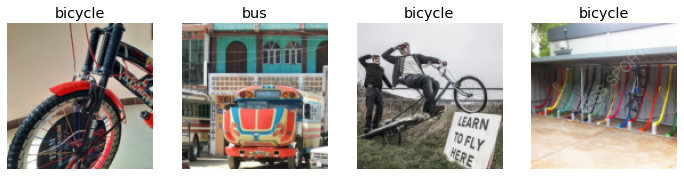

In [76]:
dls.valid.show_batch(max_n=4,nrows=1)

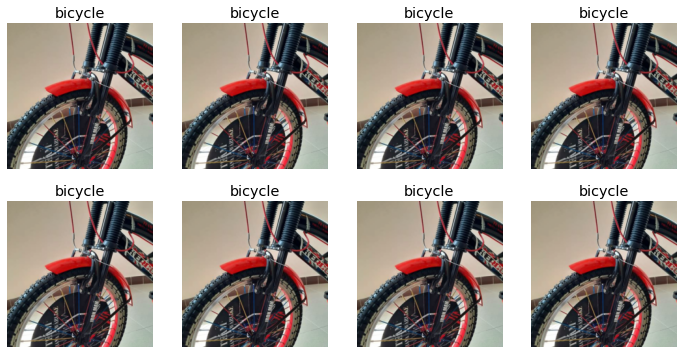

In [89]:
vehicles = vehicles.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = vehicles.dataloaders(path,num_workers=0)

dls.valid.show_batch(max_n=8,nrows=2, unique=True)

In [94]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.575716,0.640858,0.200514,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.457508,0.515767,0.154242,00:08
1,0.343234,0.584616,0.187661,00:08
2,0.262907,0.592213,0.197943,00:08


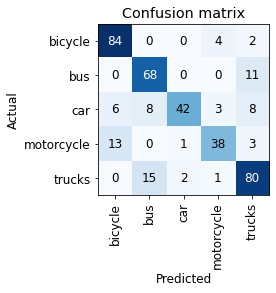

In [95]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

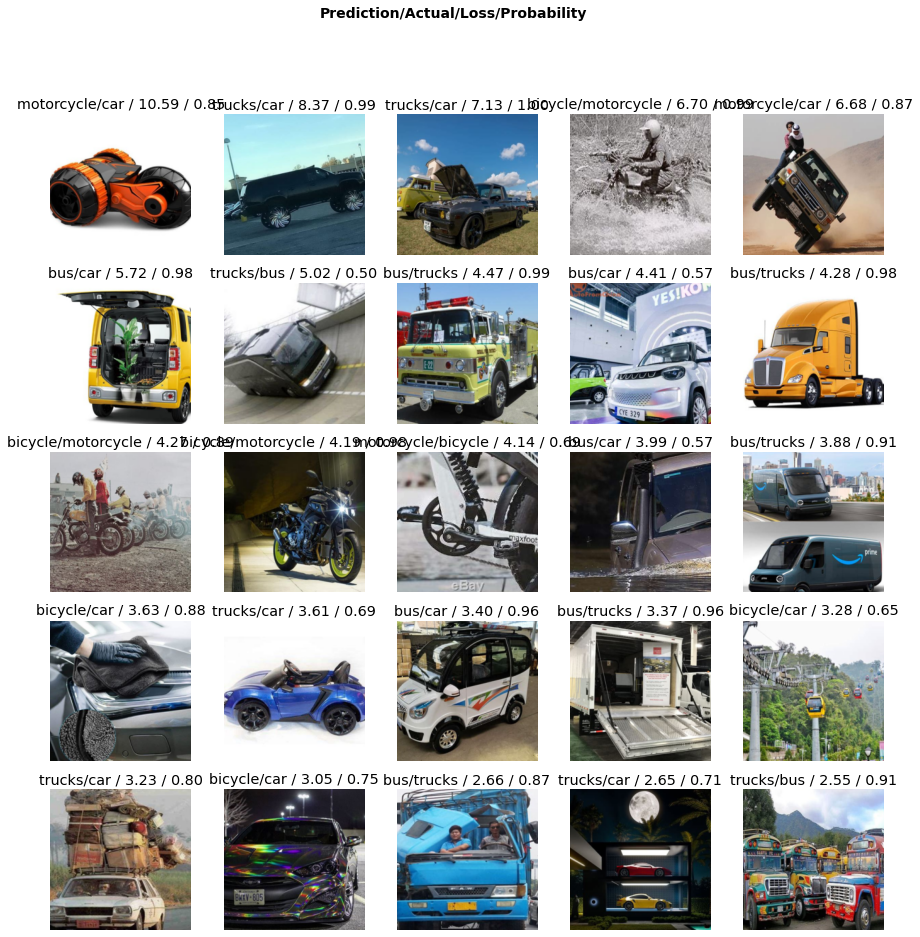

In [96]:
interp.plot_top_losses(25, nrows=5)

In [93]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [70]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [137]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [138]:
img = PILImage.create(btn_upload.data[-1])

In [139]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [140]:
learn.export()

In [141]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [142]:
learn_inf = load_learner(path/'export.pkl')

In [145]:
learn_inf.predict(r'D:\SEPA\pony.jpg')

('car',
 tensor(2),
 tensor([2.8256e-02, 1.9755e-04, 5.0308e-01, 4.6471e-01, 3.7570e-03]))

In [106]:
learn_inf.dls.vocab

['bicycle', 'bus', 'car', 'motorcycle', 'trucks']

In [144]:
pred,pred_idx,probs=learn_inf.predict(img)

In [109]:
lbl_pred=widgets.Label()
lbl_pred.value=f'Prediction:{pred}; Probability:{probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction:trucks; Probability:0.9923')

In [133]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [149]:
btn_upload = widgets.FileUpload()

In [150]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [151]:
VBox([widgets.Label('Select your vehicle'), 
      btn_upload, btn_run, out_pl, lbl_pred])